# Project 5: Application - Twitter Data

In [9]:
import os
import json
import pytz
import math
import numpy as np
from datetime import datetime, timedelta
import statsmodels.api as statsmodel
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Set time as Los Angeles time 
pst_tz = pytz.timezone('America/Los_Angeles')

# Question 1
1. Average number of tweets per hour
2. Average number of followers of users posting the tweets per tweet
3. Average number of retweets per tweet

In [3]:
def calc_statistics(file_name):
    # define lists to store information
    num_retweets_list = []                 
    num_followers_list = []               
    num_tweets = 0                                            
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = eachTweet['citation_date']
            
        end_time = eachTweet['citation_date']
        
        # number of retweets of a tweets
        num_retweets_list.append(eachTweet['metrics']['citations']['total']) 
        # number of followers
        num_followers_list.append(eachTweet['author']['followers']) 
        # number of twitters
        num_tweets = num_tweets + 1
    
    # Calculation
    num_hours = np.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16    
    num_retweets = np.sum(num_retweets_list)
    num_followers = np.sum(num_followers_list)
    
    avg_tweets_per_hour = num_tweets / num_hours
    avg_followers_per_tweet = num_followers / num_tweets
    avg_retweets_per_tweet = num_retweets / num_tweets
    
    print('Average number of tweets per hour is ', round(avg_tweets_per_hour,2))
    print('Average number of followers of users posting the tweets per tweet is ', round(avg_followers_per_tweet,2))
    print('Average number of retweets per tweet is ', round(avg_retweets_per_tweet,2))
    return avg_tweets_per_hour, avg_followers_per_tweet, avg_retweets_per_tweet


# Twitter Name
file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

# Run each files 
for i in file_names:
    print("%s :" % i)
    calc_statistics(i)

print("done!")

tweets_#gohawks.txt :
Average number of tweets per hour is  340.97
Average number of followers of users posting the tweets per tweet is  2217.92
Average number of retweets per tweet is  2.01
tweets_#gopatriots.txt :
Average number of tweets per hour is  41.47
Average number of followers of users posting the tweets per tweet is  1427.25
Average number of retweets per tweet is  1.41
tweets_#nfl.txt :
Average number of tweets per hour is  461.43
Average number of followers of users posting the tweets per tweet is  4662.38
Average number of retweets per tweet is  1.53
tweets_#patriots.txt :
Average number of tweets per hour is  759.69
Average number of followers of users posting the tweets per tweet is  3280.46
Average number of retweets per tweet is  1.79
tweets_#sb49.txt :
Average number of tweets per hour is  1275.56
Average number of followers of users posting the tweets per tweet is  10374.16
Average number of retweets per tweet is  2.53
tweets_#superbowl.txt :
Average number of tweet

# Question 2

<Figure size 432x288 with 0 Axes>

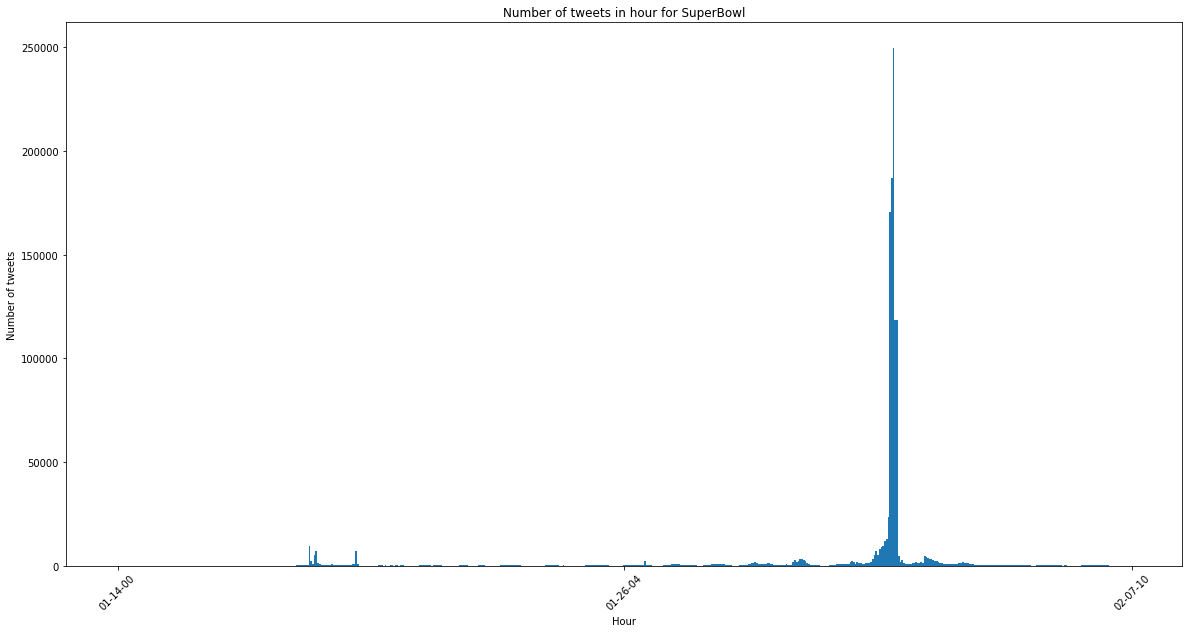

<Figure size 432x288 with 0 Axes>

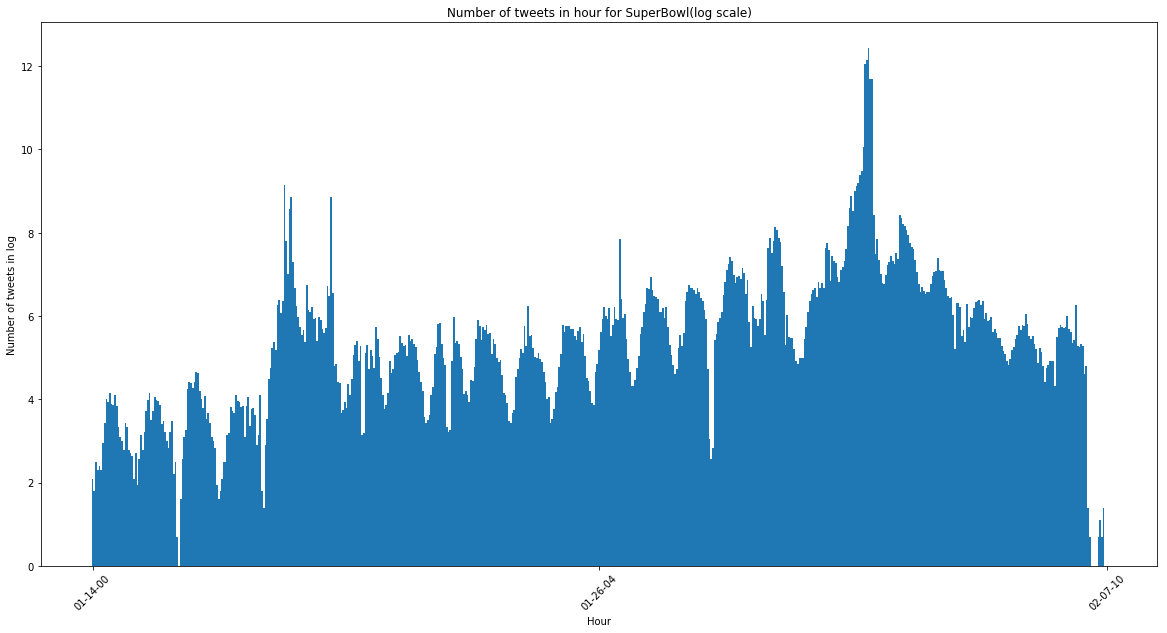

<Figure size 432x288 with 0 Axes>

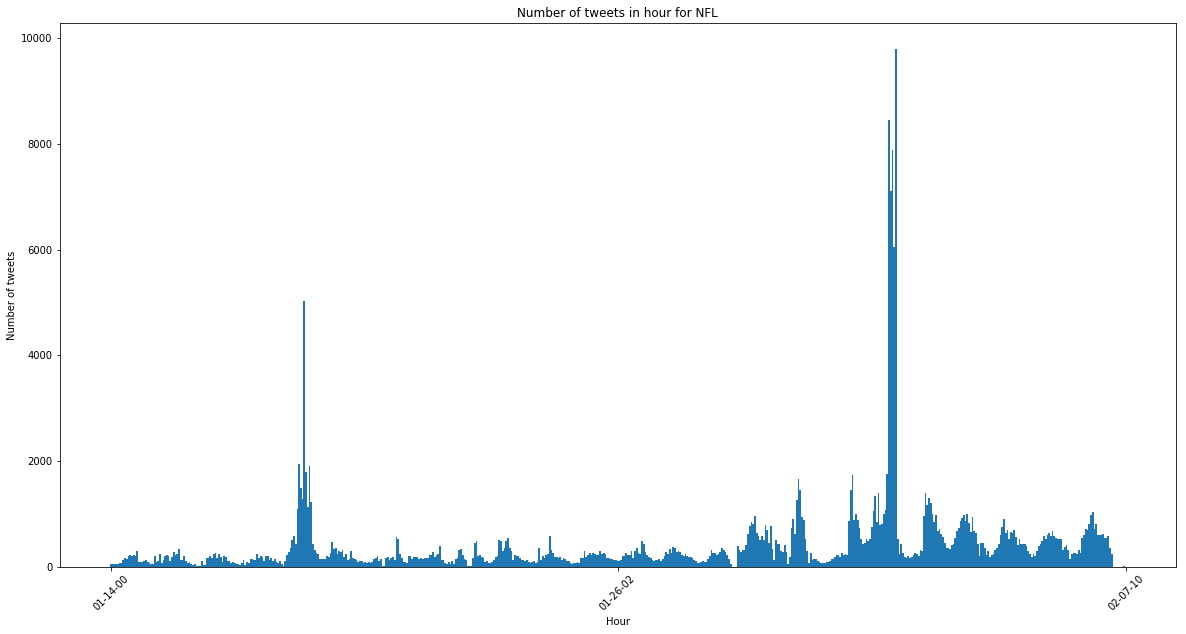

<Figure size 432x288 with 0 Axes>

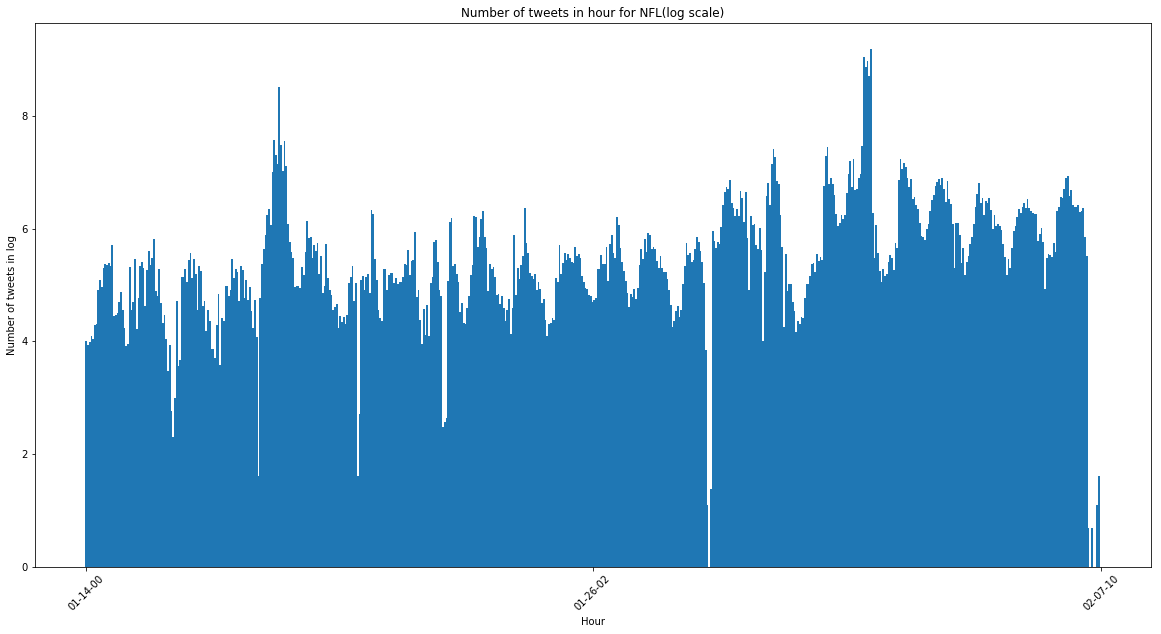

In [4]:
def plot_num_tweets_per_hour(file_name, hashtag_name):  
    # Store the number of tweets in each hour
    hour_list = []
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hour_list.append(mdh)
        
        
    hour_list = np.unique(hour_list)
    # form a map, key: date, value: num of tweets
    hm_map = {i : 0 for i in hour_list}
        
    f = open(file_name, 'r', encoding = 'utf-8')

    for lineNum, line in enumerate(f) :
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hm_map[mdh] = hm_map[mdh] + 1   
    
    # plot the figure
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), hm_map.values(), width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets')
    plt.title(('Number of tweets in hour for ' + hashtag_name))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()
    
    logNum = []
    for i in hm_map.values() :
        logNum.append(np.log(i))
    
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), logNum, width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets in log')
    plt.title(('Number of tweets in hour for ' + hashtag_name + '(log scale)'))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()


# Plot the two figures
plot_num_tweets_per_hour('tweets_#superbowl.txt', 'SuperBowl')
plot_num_tweets_per_hour('tweets_#nfl.txt', 'NFL')

# Question 3

In [15]:
def extract_five_features(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0 
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
    
    # use start time and end time to calculate of the number total hours
    num_hours = math.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16
    
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,5])
    
    # calculate the feature values in each hour
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        hour_idx = int((eachTweet['citation_date'] - start_time)/3600)   # in which hour (in which index)
        hourly_features[hour_idx][0] += 1  # total number of tweets
        hourly_features[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
        hourly_features[hour_idx][2] += eachTweet['author']['followers']  # total number of followers
        if eachTweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] = eachTweet['author']['followers']  # maximum followers
        tweet_time_UNIX = eachTweet['citation_date'] 
        tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        
    return hourly_features

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_five_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict(X_train)

    mse = metrics.mean_squared_error(y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('p values : ', RegressionModel.pvalues)
    print('t-test : ', RegressionModel.tvalues)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

**************************************************
For  tweets_#gohawks.txt :
MSE value:  716101.690801841
RMSE value:  846.2279189449146
R-squares measure :  0.5289248105728146
p values :  [4.42086862e-20 1.04587450e-05 1.36692130e-04 3.22970250e-02
 2.81404313e-02]
t-test :  [ 9.5294923  -4.44705288 -3.8401074   2.14594155  2.20091074]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           3.11e-91
Time:                        18:14:05   Log-Likelihood:                -4716.3
No. Observations:                 578   AIC:                             9443.
Df Residuals:                     573   BIC:                             9464.
Df Model:  

**************************************************
For  tweets_#sb49.txt :
MSE value:  13171504.39991799
RMSE value:  3629.256728300988
R-squares measure :  0.8416361286654217
p values :  [3.46364913e-34 2.62944491e-02 3.59785108e-01 1.13873506e-05
 2.34582314e-01]
t-test :  [13.02630523 -2.22756426  0.91650475  4.42783206 -1.18988154]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     613.3
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          3.62e-228
Time:                        18:17:35   Log-Likelihood:                -5596.4
No. Observations:                 582   AIC:                         1.120e+04
Df Residuals:                     577   BIC:                         1.122e+04
Df Model:    

# Question 4

In [19]:
# All features we want to explore
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Total number of impressions',
                'Total number of momentum', 'Total number of favorite count', 'Total number of ranking score',
                'Total number of acceleration', 'Total number of replies', 'Total number of unique users',
                'Total number of unique authors', 'Total number of user mentions']

def extract_more_features(file_name):
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0 
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
        
    num_hours = math.ceil((end_time - start_time)/3600)   # math.ceil(15.0)=15, math.ceil(15.2)=16
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,14])
    
    # define lists to store unique users and authors
    unique_user_list = []
    unique_author_list = []
    
    f.close()
    
    f= open(file_name, 'r', encoding = 'utf-8')

    # calculate the feature values in each hour
    for tweet_string in f:
        tweet = json.loads(tweet_string)
        hour_idx = int((tweet['citation_date'] - start_time)/3600)                  
        hourly_features[hour_idx][0] += 1                                                  # total number of tweets
        hourly_features[hour_idx][1] += tweet['metrics']['citations']['total']             # total number of retweets
        hourly_features[hour_idx][2] += tweet['author']['followers']                       # total number of followers
        
        if tweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] = tweet['author']['followers']                    # maximum followers
            
        tweet_time_UNIX = tweet['citation_date'] 
        tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        
        hourly_features[hour_idx][5] += tweet['metrics']['impressions']                    # total number of impression
        hourly_features[hour_idx][6] += tweet['metrics']['momentum']                       # total number of momentum 
        hourly_features[hour_idx][7] += tweet['tweet']['favorite_count']                   # total number of favorite count
        hourly_features[hour_idx][8] += tweet['metrics']['ranking_score']                  # total number of ranking score
        hourly_features[hour_idx][9] += tweet['metrics']['acceleration']                   # total number of acceleration
        hourly_features[hour_idx][10] += tweet['metrics']['citations']['replies']          # total number of replies  
        if tweet['tweet']['user']['id'] not in unique_user_list:
            unique_user_list.append(tweet['tweet']['user']['id'])                          # total number of unique users
            hourly_features[hour_idx][11] += 1
        if tweet['author']['name'] not in unique_author_list:
            unique_author_list.append(tweet['author']['name'])                             # total number of unique authors
            hourly_features[hour_idx][12] += 1
        hourly_features[hour_idx][13] += len(tweet['tweet']['entities']['user_mentions'])  # total number of user mentions
        
    return hourly_features


file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_more_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict(X_train)

    mse = metrics.mean_squared_error(y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('p values : ', RegressionModel.pvalues)
    print('t-test : ', RegressionModel.tvalues)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

**************************************************
For  tweets_#gohawks.txt :
MSE value:  414743.142968156
RMSE value:  644.0055457588514
R-squares measure :  0.7271683517202944
p values :  [4.32658730e-04 6.09384448e-05 1.34927098e-01 2.63677589e-01
 7.83523860e-03 1.73215741e-03 1.30150293e-16 2.57739273e-09
 2.55563154e-06 4.85694869e-01 9.24758854e-09 3.26926042e-02
 1.76026196e-01 1.01607789e-04]
t-test :  [-3.54031072 -4.03969286 -1.49709824 -1.11885666 -2.66863321  3.1477661
 -8.53490438  6.05414237  4.7522881   0.69763197  5.83166609 -2.14111638
  1.3547922   3.91464638]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          9.37e-149
Ti

**************************************************
For  tweets_#patriots.txt :
MSE value:  3568809.458762839
RMSE value:  1889.1292858782426
R-squares measure :  0.7776489858517225
p values :  [1.73738836e-01 1.65083385e-02 9.24242568e-04 3.43381686e-09
 7.77782200e-01 9.16049970e-01 1.91389211e-03 3.35497701e-01
 1.65606833e-01 6.96285866e-01 5.80794184e-01 1.78965259e-04
 9.35407844e-05 5.41098419e-11]
t-test :  [-1.3619847  -2.40456943  3.33004486 -6.00342856  0.28234358 -0.10545724
 -3.11775862  0.96391134  1.38823198 -0.3905357   0.55254014 -3.77177149
  3.9347083   6.6874702 ]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          3.26e-17

# Question 5

In [33]:
feb18am = datetime(year=2015,month=2,day=1,hour=8,tzinfo=pst_tz) 
feb18pm = datetime(year=2015,month=2,day=1,hour=8,tzinfo=pst_tz)
print(feb18am)
print(feb18pm)
start_time, end_time = 2147483647, 0
f = open('tweets_#gohawks.txt', 'r', encoding = 'utf-8')
for lineNum, line in enumerate(f) : 
    eachTweet = json.loads(line)
    start_time = min(eachTweet['citation_date'],start_time)  
    end_time = max(eachTweet['citation_date'],end_time)
print(datetime.fromtimestamp(start_time,pst_tz))

2015-02-01 08:00:00-07:53
2015-02-01 20:00:00-07:53
2015-01-14 00:04:41-08:00


# Question 6

In [20]:
def three_window_analysis(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0
    feb18am, feb18pm = datetime.datetime(2010,11,12,13,14,15,16), datetime.datetime(2010,11,12,13,14,15,16)
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
        
    period1_hour = math.ceil((feb18am - start_time)/3600)   # before Feb. 1, 8：00 am
    period2_5min = math.ceil((feb18pm - feb18am)/3600/12)   # between Feb. 1, 8:00 am and Feb. 1, 8:00 pm
    period3_hour = math.ceil((end_time - feb18pm)/3600)     # after Feb. 1, 8:00 pm
    
    # define a np.array to store feature values
    hourly_features_1 = np.zeros([period1_hour,5])
    fivemin_features = np.zeros([period2_5min,5])
    hourly_features_2 = np.zeros([period3_hour,5])
    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        if (eachTweet['citation_date'] <= feb18am) :
            hour_idx = int((eachTweet['citation_date'] - start_time)/3600)                # in which hour (in which index)
            hourly_features_1[hour_idx][0] += 1                                           # total number of tweets
            hourly_features_1[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            hourly_features_1[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > hourly_features_1[hour_idx][3]:
                hourly_features_1[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            hourly_features_1[hour_idx][4] = tweet_time.hour  # hour
        else if (eachTweet['citation_date'] > feb18am && eachTweet['citation_date'] < feb18am) :
            fivemin_idx = int((eachTweet['citation_date'] - feb18am)/3600/12)               # in which hour (in which index)
            fivemin_features[fivemin_idx][0] += 1                                           # total number of tweets
            fivemin_features[fivemin_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            fivemin_features[fivemin_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > fivemin_features[fivemin_idx][3]:
                fivemin_features[fivemin_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            fivemin_features[fivemin_idx][4] = tweet_time.hour 
        else :
            hour_idx = int((eachTweet['citation_date'] - feb18pm)/3600)                   # in which hour (in which index)
            hourly_features_2[hour_idx][0] += 1                                           # total number of tweets
            hourly_features_2[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            hourly_features_2[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > hourly_features_2[hour_idx][3]:
                hourly_features_2[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            hourly_features_2[hour_idx][4] = tweet_time.hour 
        
    p1_train = hourly_features_1[:-1,:]
    p1_y = hourly_features_1[1:,0]
    RegressionModel = statsmodel.OLS(p1_y, p1_train).fit()
    y_pred = RegressionModel.predict(p1_train)
    
    mse = metrics.mean_squared_error(p1_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p1_y, y_pred))
    
    print('-'*50)
    print('Before 2/1/8:00 AM')
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)
    
    p2_train = hourly_features_1[:-1,:]
    p2_y = hourly_features_1[1:,0]
    RegressionModel = statsmodel.OLS(p2_y, p2_train).fit()
    y_pred = RegressionModel.predict(p2_train)
    
    mse = metrics.mean_squared_error(p2_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p2_y, y_pred))
    
    print('Between 2/1 8:00 AM and 2/1 8:00 PM')
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)
    
    p3_train = hourly_features_2[:-1,:]
    p3_y = hourly_features_2[1:,0]
    RegressionModel = statsmodel.OLS(p3_y, p3_train).fit()
    y_pred = RegressionModel.predict(p3_train)
    
    print('After 2/1/8:00 AM')
    mse = metrics.mean_squared_error(p1_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p1_y, y_pred))

    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    print('for %s', &file_name)
    three_window_analysis(file_name)
    X_train = X[:-1,:]  
    print('\n\n')

SyntaxError: invalid syntax (<ipython-input-20-dc086b75a684>, line 35)

# Question 7

In [ ]:
def three_window_analysis_aggregate(file_list):
    start_time, end_time = 2147483647, 0
    feb18am, feb18pm = datetime.datetime(2010,11,12,13,14,15,16), datetime.datetime(2010,11,12,13,14,15,16)
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f1) : 
            eachTweet = json.loads(line)
            start_time = min(eachTweet['citation_date'],start_time)  
            end_time = max(eachTweet['citation_date'],end_time)
    
    period1_hour = math.ceil((feb18am - start_time)/3600)   # before Feb. 1, 8：00 am
    period2_5min = math.ceil((feb18pm - feb18am)/3600/12)   # between Feb. 1, 8:00 am and Feb. 1, 8:00 pm
    period3_hour = math.ceil((end_time - feb18pm)/3600)     # after Feb. 1, 8:00 pm
    
    # define a np.array to store feature values
    hourly_features_1 = np.zeros([period1_hour,5])
    fivemin_features = np.zeros([period2_5min,5])
    hourly_features_2 = np.zeros([period3_hour,5])
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            if (eachTweet['citation_date'] <= feb18am) :
                hour_idx = int((eachTweet['citation_date'] - start_time)/3600)                # in which hour (in which index)
                hourly_features_1[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_1[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_1[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_1[hour_idx][3]:
                    hourly_features_1[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_1[hour_idx][4] = tweet_time.hour  # hour
            else if (eachTweet['citation_date'] > feb18am && eachTweet['citation_date'] < feb18am) :
                fivemin_idx = int((eachTweet['citation_date'] - feb18am)/3600/12)               # in which hour (in which index)
                fivemin_features[fivemin_idx][0] += 1                                           # total number of tweets
                fivemin_features[fivemin_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                fivemin_features[fivemin_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > fivemin_features[fivemin_idx][3]:
                    fivemin_features[fivemin_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                fivemin_features[fivemin_idx][4] = tweet_time.hour 
            else :
                hour_idx = int((eachTweet['citation_date'] - feb18pm)/3600)                   # in which hour (in which index)
                hourly_features_2[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_2[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_2[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_2[hour_idx][3]:
                    hourly_features_2[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_2[hour_idx][4] = tweet_time.hour 
            
    p1_train = hourly_features_1[:-1,:]
    p1_y = hourly_features_1[1:,0]
    RegressionModel = statsmodel.OLS(p1_y, p1_train).fit()
    y_pred = RegressionModel.predict(p1_train)
    
    mse = metrics.mean_squared_error(p1_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p1_y, y_pred))
    
    print('-'*50)
    print('Before 2/1/8:00 AM')
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)
    
    p2_train = hourly_features_1[:-1,:]
    p2_y = hourly_features_1[1:,0]
    RegressionModel = statsmodel.OLS(p2_y, p2_train).fit()
    y_pred = RegressionModel.predict(p2_train)
    
    mse = metrics.mean_squared_error(p2_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p2_y, y_pred))
    
    print('Between 2/1 8:00 AM and 2/1 8:00 PM')
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)
    
    p3_train = hourly_features_2[:-1,:]
    p3_y = hourly_features_2[1:,0]
    RegressionModel = statsmodel.OLS(p3_y, p3_train).fit()
    y_pred = RegressionModel.predict(p3_train)
    
    print('After 2/1/8:00 AM')
    mse = metrics.mean_squared_error(p1_y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(p1_y, y_pred))

    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('-'*50)